In [5]:
#--------Always include this heading in experiments
from pickle import NEXT_BUFFER
import sys, os
from time import time
sys.path.append(os.path.join(sys.path[0],'..'))

from TFIM import *
from NQS_RBM import *
from TD_NQS_RBM import *
from PLOTTING import *

np.random.seed(12)

EXPERIMENTS_PATH = sys.path[0]
RESULTS_PATH = EXPERIMENTS_PATH + "/data/" 
#-------------------------------------------------------

In [8]:
init_H = TFIM(h=0.5, g=0.5)
target_H = TFIM(h=0.6, g=0.6)   

N_V = 10
N_H = 40 

delta_t = 0.0005
end_of_time = 0.05

5.0

In [9]:
regs = [1e-6]
data = np.zeros((int(end_of_time//delta_t),len(regs)), dtype = complex)

init_state_params = {"kContrastDiv": 6000, 
                     "lrate": 0.1, 
                     "epochs": 70}

for i, reg in enumerate(regs):

    evol_params = {'target_H': target_H,
            'delta_t': delta_t,
            'end_of_time': end_of_time,
            'kContrastDiv': 6000,
            'reg_mode':'diag_shift',
            'reg_strength':reg,
            'val_fraction':0.2}

    td_nqs_model = TD_NQS_RBM(init_H = init_H,
                            Nv = N_V,
                            Nh = N_H,
                            init_mode="ground_state",
                            init_state_params=init_state_params)

    time_evol_output = td_nqs_model.evolute_quench(**evol_params, required_paulis = [[f"X{s}" for s in range(N_V)],[f"Z{s}" for s in range(N_V)]])

    x_over_time = []

    inter = time_evol_output[4]
    
    for t in range(int(end_of_time//delta_t)):
        all_x_at_t = np.array(inter[1][t][0], dtype=complex)
        average_x_at_t = np.mean(all_x_at_t)
        x_over_time.append(average_x_at_t)

    data[:,i] = x_over_time

np.savetxt('reg2.txt', data)
#plot_reg_sweep(timesteps, data, regs)



    

            Neural Quantum State of the transverse field Ising model:
            Ising model parameters J, h: 1.000000, 0.500000
            Number of visible spins: 10
            Number of hidden spins: 40
            
Magnetization of Initial state:  -1.0
Succesfully imported precomputed ground state!
Starting a quench...
[['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9'], ['Z0', 'Z1', 'Z2', 'Z3', 'Z4', 'Z5', 'Z6', 'Z7', 'Z8', 'Z9']]


  0%|          | 0/100 [00:00<?, ?it/s]

Percentage Rejections in Burn-in: 97.00 %
Gradient absval-squared: a: 0.0002, c: 0.0000, W: 0.0000. average weight update size: -2.0870151477899904e-05j


  0%|          | 0/100 [00:22<?, ?it/s]


MemoryError: Unable to allocate 7.24 GiB for an array with shape (4800, 450, 450) and data type float64

In [4]:
inter = time_evol_output[4]
x_over_time = []
    
for t in range(int(end_of_time//delta_t)):
        all_x_at_t = np.array(inter[1][t][0], dtype=complex)
        average_x_at_t = np.mean(all_x_at_t)
        x_over_time.append(average_x_at_t)

data[:,i] = x_over_time

np.savetxt('reg.txt', data)

In [31]:
data

array([[0.24047193+0.00000000e+00j],
       [0.26023042+8.33117029e-05j],
       [0.25852534+1.90118701e-04j],
       [0.25412594+2.18599267e-04j],
       [0.26325378+3.18598762e-04j],
       [0.25813864+3.67629065e-04j],
       [0.26356673+4.41807542e-04j],
       [0.26387082+4.90671655e-04j],
       [0.2738305 +6.22312256e-04j],
       [0.26743923+6.10996635e-04j],
       [0.26800337+5.74536653e-04j],
       [0.2736401 +7.91406236e-04j]])

c:\Users\PimVeefkind\miniconda3\envs\pcqi\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


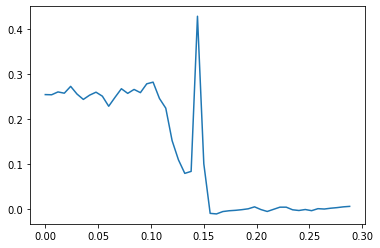

In [5]:
plt.plot(np.arange(0,end_of_time,delta_t)[:-1],data)